# Testing how the "true" SDF model does on the new gazebo data

In [1]:
import numpy as np
import tensorflow as tf
import keras

from link_bot_models import base_model_runner
from link_bot_models.multi_environment_datasets import MultiEnvironmentDataset
from link_bot_models.label_types import LabelType
from link_bot_models.sdf_function_model import SDFFunctionModelRunner
from link_bot_pycommon import experiments_util
import matplotlib.pyplot as plt

plt.style.use("slides")
plt.style.use("slides")

Using TensorFlow backend.


In [8]:
train_dataset = "./data/gz_train_2362dceb2a_100_1000_balanced/dataset.json"
validation_dataset = "./data/gz_debug_23aedc357f_1_10000/dataset.json"
train_dataset = MultiEnvironmentDataset.load_dataset(train_dataset)
validation_dataset = MultiEnvironmentDataset.load_dataset(validation_dataset)
sdf_shape = train_dataset.sdf_shape
label_types_map = [[LabelType.SDF.name, LabelType.Combined.name]]
batch_size = 100

args_dict = {
    'sdf_shape': sdf_shape,
    'beta': 1e-2,
    'fc_layer_sizes': [],
    'sigmoid_scale': 100,
    'N': train_dataset.N,
    'seed': 0,
    'batch_size': batch_size,
}

keras.backend.clear_session() 
model = SDFFunctionModelRunner(args_dict)

print(model.keras_model.get_weights())

[array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)]


In [3]:
# model.train(train_dataset, validation_dataset, args.label_types_map, None, args)

In [4]:
model.evaluate(validation_dataset, label_types_map)

Batch size 100 doesn't evenly divide the dataset size 3226, rounding down to 3200
Validation:
loss: 3.1667
acc: 0.5697


(['loss', 'acc'], [3.1666994988918304, 0.5696874987334013])

In [9]:
generator = validation_dataset.generator([LabelType.SDF.name], batch_size, shuffle=False)
for i in range(len(generator)):
    x, y = generator[i]
    points = model.sdf_input_model.predict(x)

/home/pmitrano/.local/opt/anaconda3/envs/ros1py3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


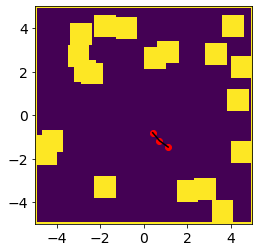

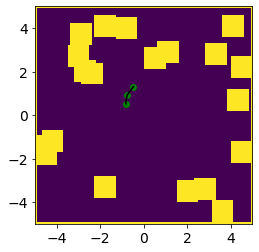

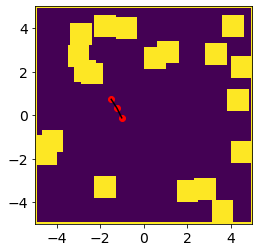

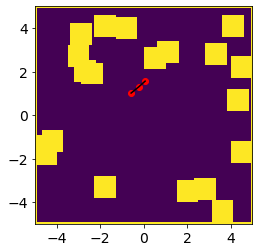

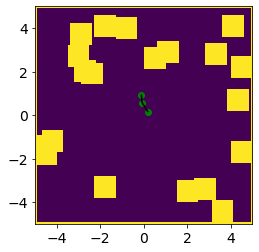

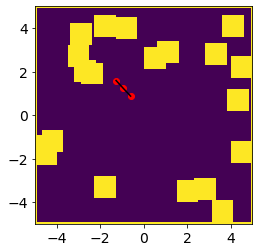

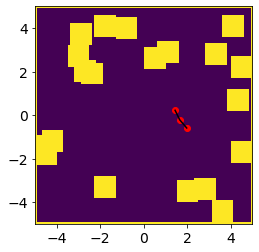

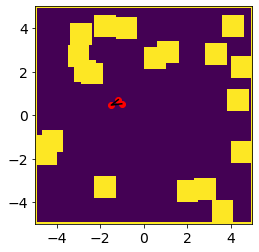

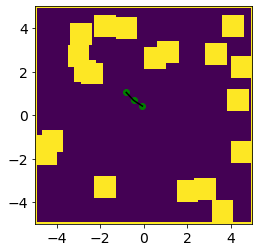

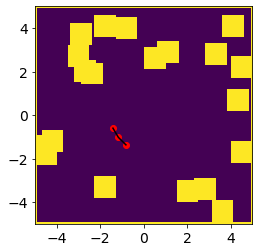

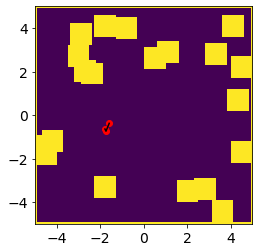

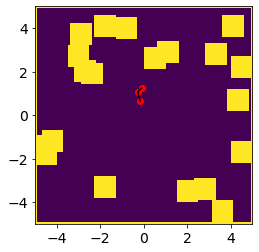

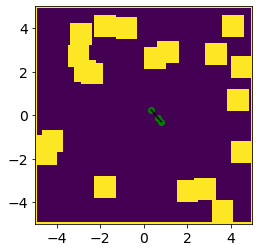

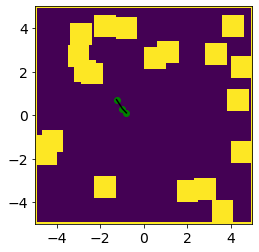

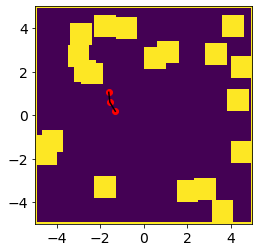

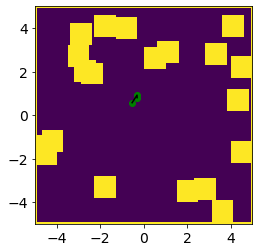

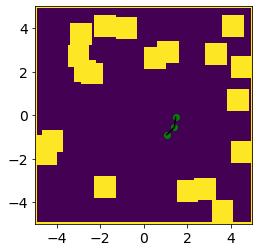

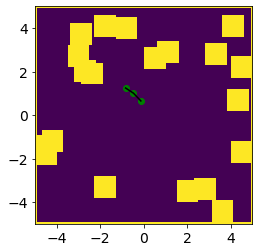

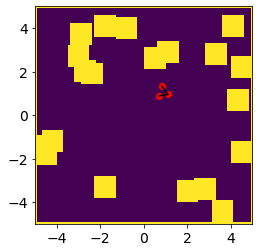

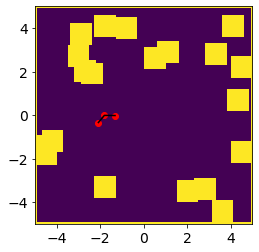

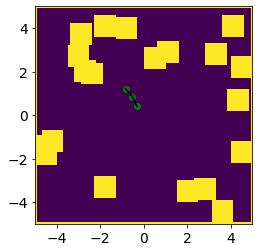

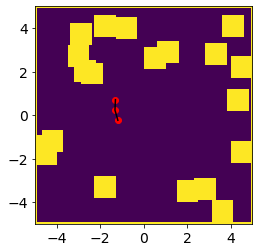

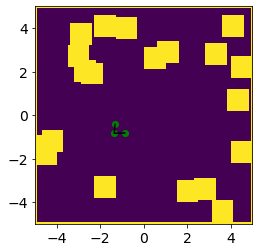

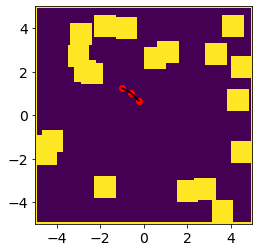

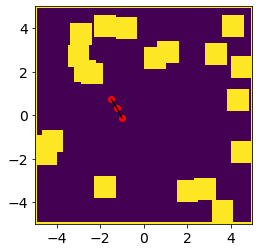

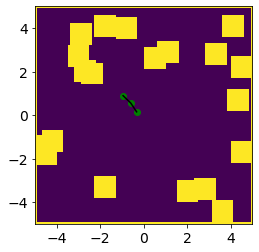

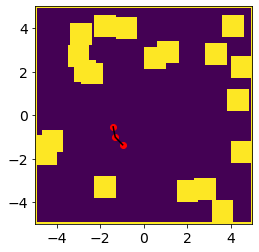

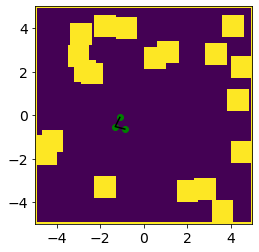

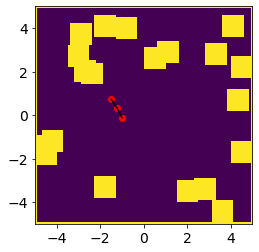

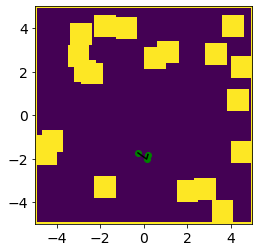

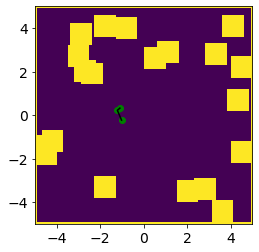

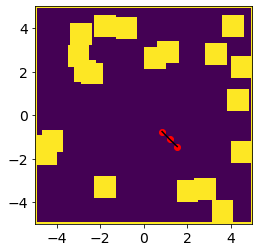

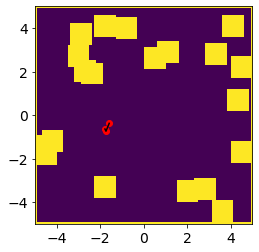

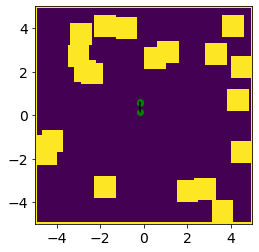

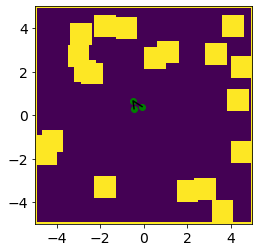

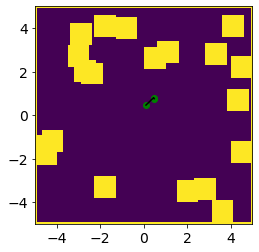

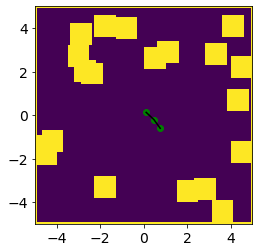

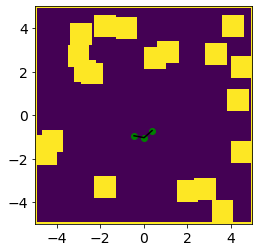

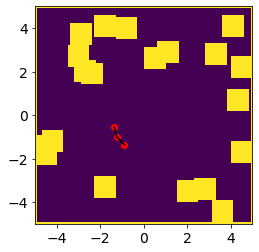

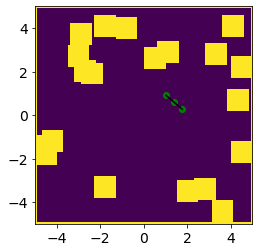

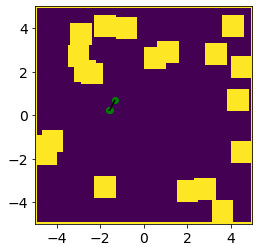

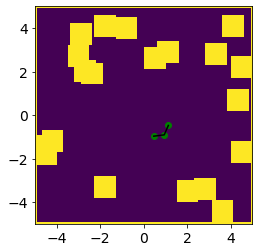

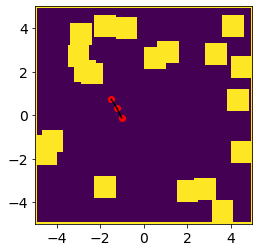

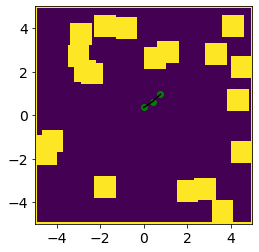

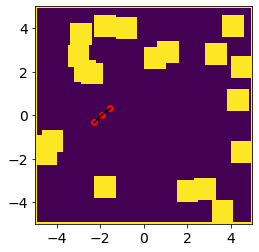

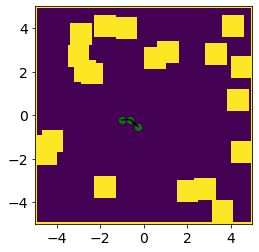

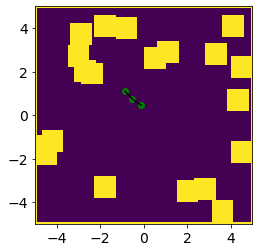

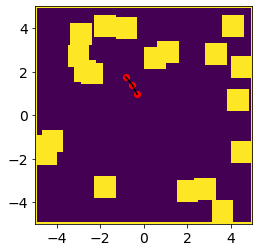

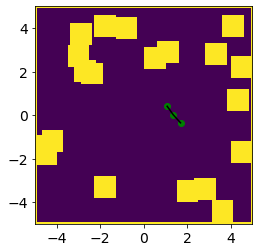

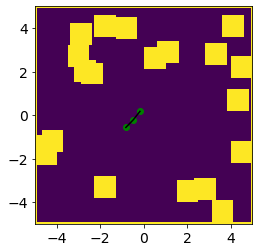

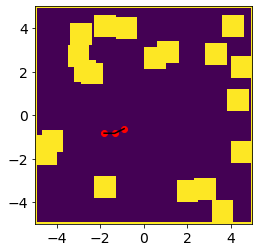

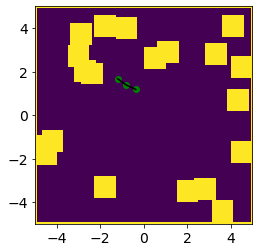

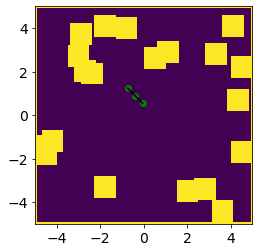

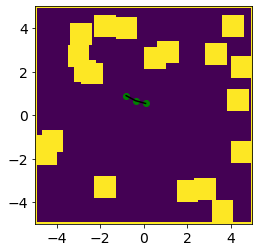

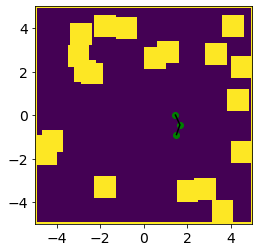

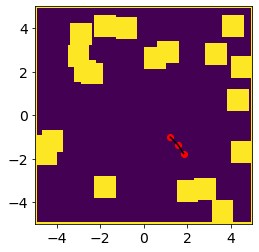

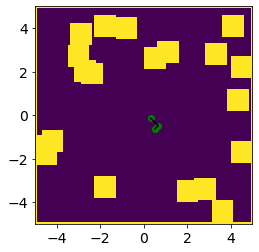

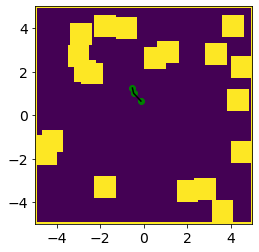

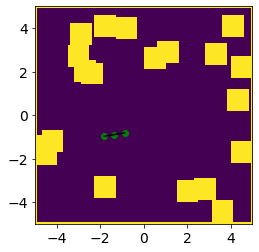

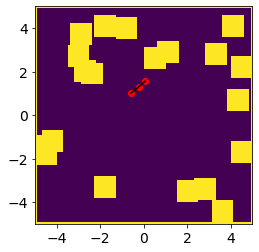

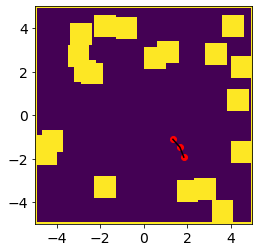

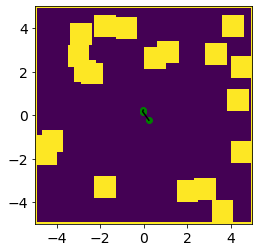

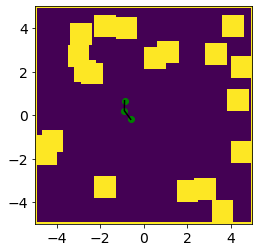

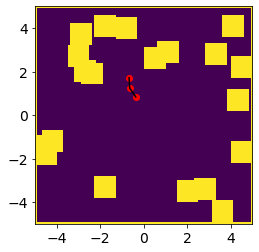

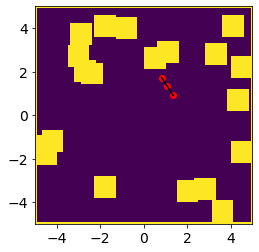

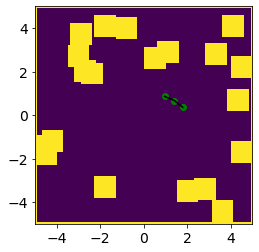

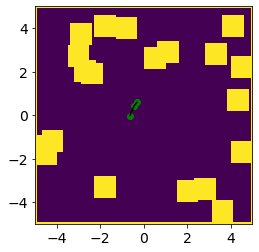

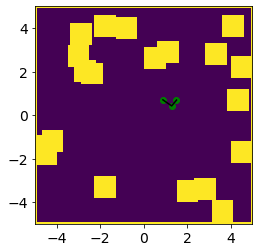

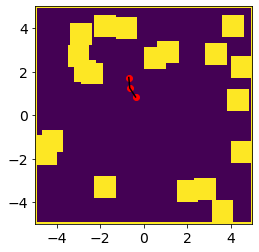

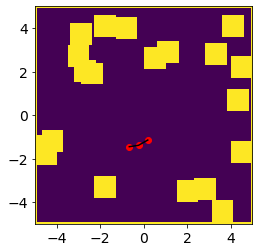

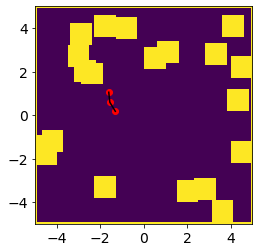

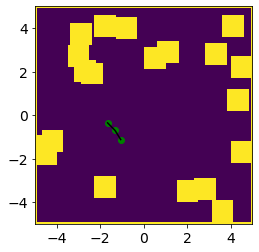

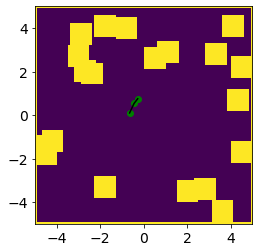

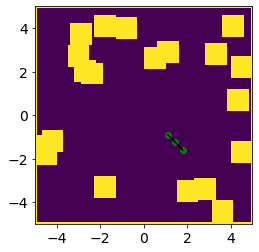

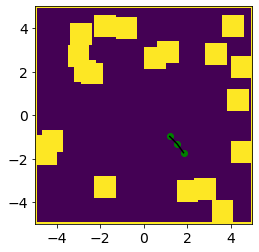

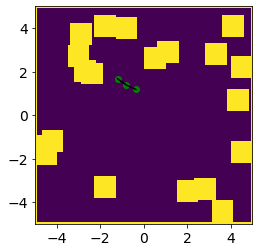

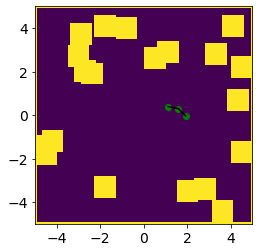

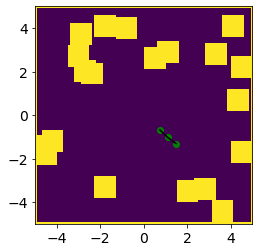

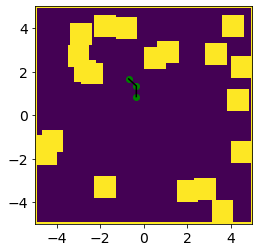

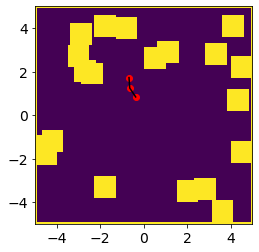

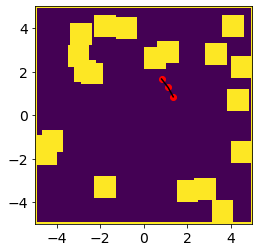

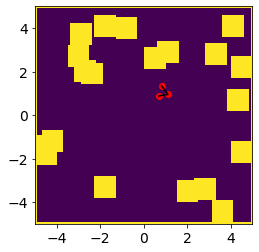

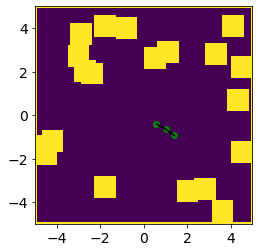

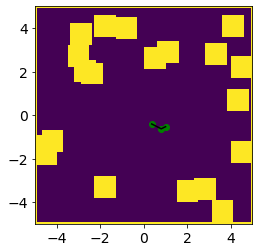

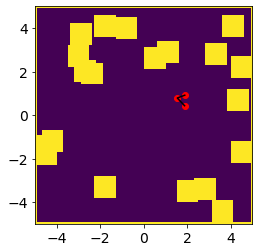

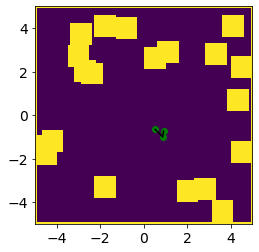

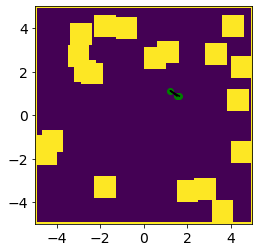

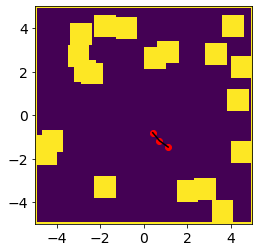

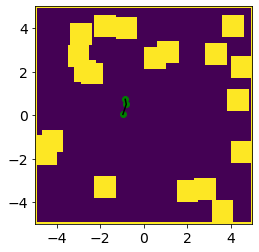

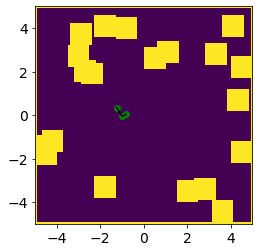

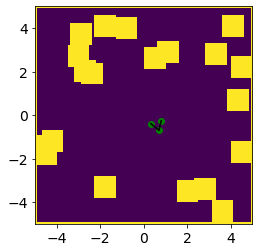

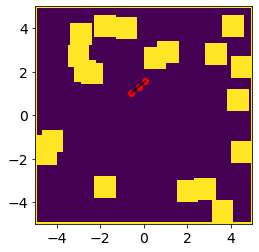

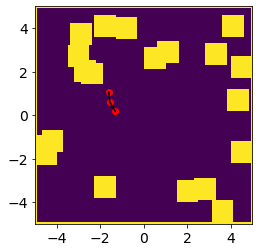

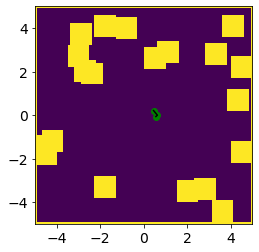

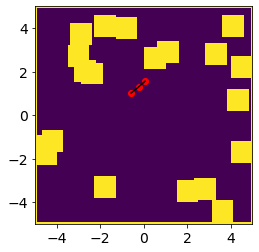

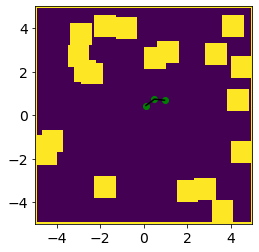

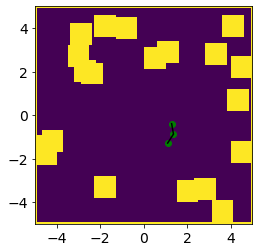

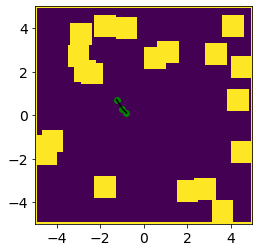

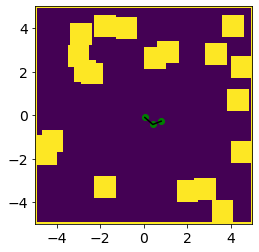

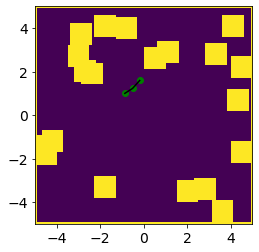

In [13]:
xs, ys = generator[0]
ys = ys['Combined']
points = model.sdf_input_model.predict(xs)
rope_configurations = xs['rope_configuration']
sdfs = xs['sdf_input']

for i in range(batch_size):
    sdf = sdfs[i]
    r = rope_configurations[i]
    y = ys[i]
    color = 'r' if y else 'g'
    plt.figure()
    img = np.flipud((sdf.squeeze() < 0).T)
    plt.imshow(img, extent=[-5,5,-5,5])
    plt.plot([r[0], r[2], r[4]], [r[1], r[3], r[5]], c='k')
    plt.scatter([r[0], r[2], r[4]], [r[1], r[3], r[5]], c=color)